<a href="https://colab.research.google.com/github/Bandari-Amulya/Machine-Learning/blob/main/lab-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]


Saving Lab Session Data.xlsx to Lab Session Data (2).xlsx


In [33]:
#A1
import pandas as pd
import numpy as np

def analyze_purchase_data(file_path):

    df = pd.read_excel(file_path, sheet_name='Purchase data')

    A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].dropna()
    C = df['Payment (Rs)'].dropna()

    A_matrix = A.to_numpy()
    C_vector = C.to_numpy()

    dim = A_matrix.shape[1]
    num_vectors = A_matrix.shape[0]
    rank = np.linalg.matrix_rank(A_matrix)
    costs = np.linalg.pinv(A_matrix) @ C_vector

    return dim, num_vectors, rank, costs


    ### A2 ###
def classify_customers_by_payment(df, threshold=200):
    df = df.copy()
    df['Label'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > threshold else 'POOR')
    return df


### A3 ###
def load_irctc_data(file_path):
    return pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

def stock_stats(df):
    mean = statistics.mean(df['Price'])
    var = statistics.variance(df['Price'])
    return mean, var

def sample_mean_by_day(df, day='Wed'):
    return statistics.mean(df[df['Day'] == day]['Price'])

def sample_mean_by_month(df, month='Apr'):
    return statistics.mean(df[df['Month'] == month]['Price'])

def prob_loss(df):
    return (df['Chg%'] < 0).mean()

def prob_profit_on_wed(df):
    return ((df['Chg%'] > 0) & (df['Day'] == 'Wed')).sum() / (df['Day'] == 'Wed').sum()

def plot_chg_vs_day(df):
    sns.scatterplot(x='Day', y='Chg%', data=df)
    plt.title("Chg% vs Day")
    plt.show()

### A4 ###
def load_thyroid_data(file_path):
    return pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

def describe_thyroid_data(df):
    desc = df.describe(include='all')
    missing = df.isnull().sum()
    return desc, missing

def encode_thyroid(df):
    encoded = df.copy()
    for col in df.select_dtypes(include='object'):
        if df[col].nunique() <= 5:
            encoded[col] = LabelEncoder().fit_transform(df[col])
        else:
            encoded = pd.get_dummies(encoded, columns=[col])
    return encoded


### A5 ###
def jaccard_smc(vec1, vec2):
    f11 = np.sum((vec1 == 1) & (vec2 == 1))
    f00 = np.sum((vec1 == 0) & (vec2 == 0))
    f10 = np.sum((vec1 == 1) & (vec2 == 0))
    f01 = np.sum((vec1 == 0) & (vec2 == 1))

    jc = f11 / (f11 + f10 + f01)
    smc = (f11 + f00) / (f11 + f10 + f01 + f00)
    return jc, smc

### A6 ###
def cosine_similarity_two(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

### A7 ###
def generate_similarity_matrix(df, method='cosine'):
    size = len(df)
    matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            if method == 'cosine':
                matrix[i][j] = cosine_similarity([df.iloc[i]], [df.iloc[j]])[0][0]
            elif method == 'jaccard':
                matrix[i][j] = 1 - jaccard(df.iloc[i], df.iloc[j])
    return matrix

def plot_heatmap(data, title="Similarity Heatmap"):
    sns.heatmap(data, annot=False)
    plt.title(title)
    plt.show()

### A8 ###
def impute_missing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif df[col].nunique() < 10:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

### A9 ###
def normalize_columns(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df


Dimensionality of vector space: 3
Number of vectors: 10
Rank of Matrix A: 3
Estimated Product Costs:
  Candy  : ₹1.00
  Mango  : ₹55.00
  Milk   : ₹18.00
Customer Classification
   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Label
0           20             6                 2           386  RICH
1           16             3                 6           289  RICH
2           27             6                 2           393  RICH
3           19             1                 2           110  POOR
4           24             4                 2           280  RICH
5           22             1                 5           167  POOR
6           15             4                 2           271  RICH
7           18             4                 2           274  RICH
8           21             1                 4           148  POOR
9           16             2                 4           198  POOR
Mean Price: 1560.66
Price Variance: 58732.37
Wednesday Mean Price: 1550.71
April Mean

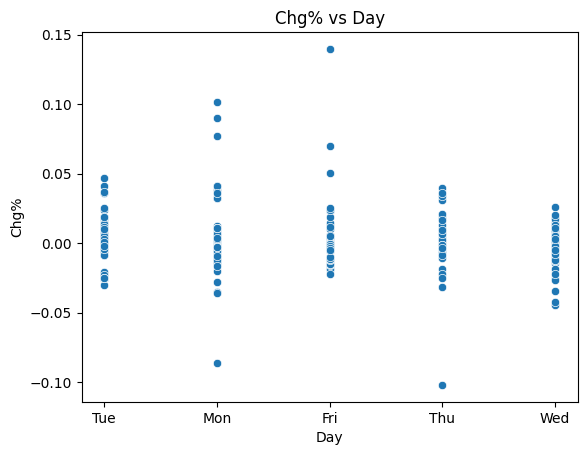


A4: Thyroid Dataset Exploration 
 Summary Statistics:
            Record ID           age   sex on thyroxine query on thyroxine  \
count   9.172000e+03   9172.000000  9172         9172               9172   
unique           NaN           NaN     3            2                  2   
top              NaN           NaN     F            f                  f   
freq             NaN           NaN  6073         7932               9019   
mean    8.529473e+08     73.555822   NaN          NaN                NaN   
std     7.581969e+06   1183.976718   NaN          NaN                NaN   
min     8.408010e+08      1.000000   NaN          NaN                NaN   
25%     8.504090e+08     37.000000   NaN          NaN                NaN   
50%     8.510040e+08     55.000000   NaN          NaN                NaN   
75%     8.607110e+08     68.000000   NaN          NaN                NaN   
max     8.701190e+08  65526.000000   NaN          NaN                NaN   

       on antithyroid medicatio

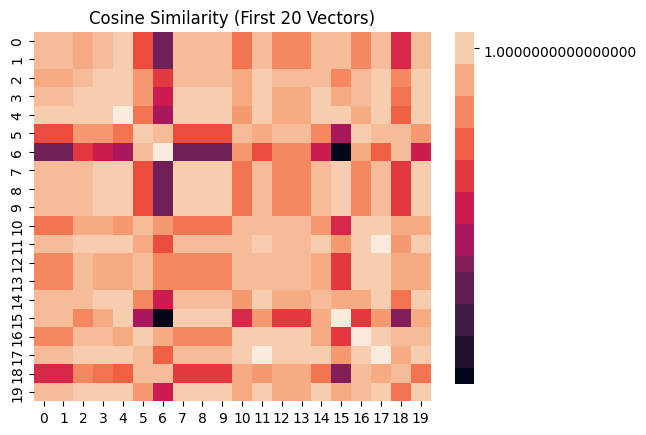


A8: Data Imputation
 Imputation complete. Sample:
    Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?        

In [34]:
#A1
file_path = "purchase data.xlsx"
dim, num_vectors, rank, costs = analyze_purchase_data(file_path)

# Print results
print("Dimensionality of vector space:", dim)
print("Number of vectors:", num_vectors)
print("Rank of Matrix A:", rank)
print("Estimated Product Costs:")
print("  Candy  : ₹{:.2f}".format(costs[0]))
print("  Mango  : ₹{:.2f}".format(costs[1]))
print("  Milk   : ₹{:.2f}".format(costs[2]))


### A2 ###
# Load data
df = pd.read_excel("purchase data.xlsx", sheet_name="Purchase data")

# Classify customers
classified_df = classify_customers_by_payment(df)

# Display first 10 rows with classification
print("Customer Classification")
print(classified_df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)', 'Label']].head(10))

#A3

# Load the IRCTC data
file_path = "purchase data.xlsx"
irctc_df = load_irctc_data(file_path)

# A3(a) Mean and Variance
mean_price, variance_price = stock_stats(irctc_df)
print("Mean Price:", round(mean_price, 2))
print("Price Variance:", round(variance_price, 2))

# A3(b) Sample Mean for Wednesday
wed_mean = sample_mean_by_day(irctc_df, day='Wed')
print("Wednesday Mean Price:", round(wed_mean, 2))

# A3(c) Sample Mean for April
april_mean = sample_mean_by_month(irctc_df, month='Apr')
print("April Mean Price:", round(april_mean, 2))

# A3(d) Probability of Loss (Chg% < 0)
loss_probability = prob_loss(irctc_df)
print("Probability of Loss:", round(loss_probability, 4))

# A3(e) Probability of Profit on Wednesday
profit_wed_probability = prob_profit_on_wed(irctc_df)
print("Probability of Profit on Wednesday:", round(profit_wed_probability, 4))

# A3(f) Plot Chg% vs Day
plot_chg_vs_day(irctc_df)


## A4 ##
print("\nA4: Thyroid Dataset Exploration ")
thyroid_df = load_thyroid_data(file_path)

# Show basic stats and missing values
desc, missing = describe_thyroid_data(thyroid_df)
print(" Summary Statistics:\n", desc)
print("\n Missing Values:\n", missing)

# Encode categorical attributes
encoded_thyroid = encode_thyroid(thyroid_df)
print("\n Encoded Data Sample:\n", encoded_thyroid.head())


### A5 ###
print("\nA5: Jaccard and SMC Coefficients")
# Use first 2 binary vectors from encoded data (assume they exist)
vec1 = encoded_thyroid.iloc[0]
vec2 = encoded_thyroid.iloc[1]

# Keep only binary columns
binary_cols = encoded_thyroid.loc[:, (encoded_thyroid.nunique() == 2)].columns
vec1_binary = vec1[binary_cols].to_numpy()
vec2_binary = vec2[binary_cols].to_numpy()

jc, smc = jaccard_smc(vec1_binary, vec2_binary)
print(f" Jaccard Coefficient: {jc:.4f}")
print(f" Simple Matching Coefficient: {smc:.4f}")

### A6 ###
print("\n A6: Cosine Similarity Between First Two Rows ")
vec1_full = encoded_thyroid.iloc[0].to_numpy()
vec2_full = encoded_thyroid.iloc[1].to_numpy()

cos_sim = cosine_similarity_two(vec1_full, vec2_full)
print(f" Cosine Similarity: {cos_sim:.4f}")

### A7 ###
print("\n A7: Similarity Matrix Heatmap (First 20 Vectors) ")
top_20 = encoded_thyroid.iloc[:20]

sim_matrix = generate_similarity_matrix(top_20, method='cosine')
plot_heatmap(sim_matrix, title="Cosine Similarity (First 20 Vectors)")

### A8 ###
print("\nA8: Data Imputation")
thyroid_missing = thyroid_df.copy()
thyroid_imputed = impute_missing(thyroid_missing)
print(" Imputation complete. Sample:\n", thyroid_imputed.head())

### A9 ###
print("\n A9: Normalization of Numeric Columns")
numeric_cols = thyroid_imputed.select_dtypes(include='number').columns
thyroid_normalized = normalize_columns(thyroid_imputed.copy(), numeric_cols)
print("Normalized Sample:\n", thyroid_normalized[numeric_cols].head())
